## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9907530	total: 47.4ms	remaining: 47.3s
1:	learn: 0.9701703	total: 48.4ms	remaining: 24.1s
2:	learn: 0.9495837	total: 49.5ms	remaining: 16.4s
3:	learn: 0.9313425	total: 50.5ms	remaining: 12.6s
4:	learn: 0.9141952	total: 51.5ms	remaining: 10.3s
5:	learn: 0.8987960	total: 52.6ms	remaining: 8.71s
6:	learn: 0.8808153	total: 53.5ms	remaining: 7.59s
7:	learn: 0.8640389	total: 54.6ms	remaining: 6.77s
8:	learn: 0.8468226	total: 55.8ms	remaining: 6.14s
9:	learn: 0.8303062	total: 56.8ms	remaining: 5.63s
10:	learn: 0.8146206	total: 57.9ms	remaining: 5.21s
11:	learn: 0.7995150	total: 58.9ms	remaining: 4.85s
12:	learn: 0.7832195	total: 59.9ms	remaining: 4.55s
13:	learn: 0.7676118	total: 61ms	remaining: 4.29s
14:	learn: 0.7531276	total: 62.7ms	remaining: 4.12s
15:	learn: 0.7388956	total: 63.8ms	remaining: 3.92s
16:	learn: 0.7262417	total: 64.9ms	remaining: 3.75s
17:	learn: 0.7132025	total: 65.9ms	remaining: 3.6s
18:	learn: 0.7004643	total: 67ms	remaining: 3.46

89:	learn: 0.3260401	total: 142ms	remaining: 1.44s
90:	learn: 0.3239784	total: 144ms	remaining: 1.44s
91:	learn: 0.3220878	total: 145ms	remaining: 1.43s
92:	learn: 0.3204140	total: 146ms	remaining: 1.43s
93:	learn: 0.3186959	total: 147ms	remaining: 1.42s
94:	learn: 0.3168241	total: 148ms	remaining: 1.41s
95:	learn: 0.3163646	total: 149ms	remaining: 1.41s
96:	learn: 0.3147141	total: 151ms	remaining: 1.4s
97:	learn: 0.3134682	total: 152ms	remaining: 1.4s
98:	learn: 0.3121789	total: 153ms	remaining: 1.39s
99:	learn: 0.3101494	total: 154ms	remaining: 1.39s
100:	learn: 0.3086020	total: 155ms	remaining: 1.38s
101:	learn: 0.3066947	total: 156ms	remaining: 1.38s
102:	learn: 0.3051753	total: 157ms	remaining: 1.37s
103:	learn: 0.3037093	total: 159ms	remaining: 1.37s
104:	learn: 0.3022204	total: 160ms	remaining: 1.36s
105:	learn: 0.3008989	total: 161ms	remaining: 1.36s
106:	learn: 0.2990413	total: 162ms	remaining: 1.35s
107:	learn: 0.2969471	total: 163ms	remaining: 1.35s
108:	learn: 0.2957039	tot

218:	learn: 0.2145543	total: 279ms	remaining: 994ms
219:	learn: 0.2139439	total: 280ms	remaining: 992ms
220:	learn: 0.2134119	total: 281ms	remaining: 990ms
221:	learn: 0.2126717	total: 282ms	remaining: 988ms
222:	learn: 0.2121619	total: 283ms	remaining: 986ms
223:	learn: 0.2116602	total: 284ms	remaining: 984ms
224:	learn: 0.2113098	total: 285ms	remaining: 982ms
225:	learn: 0.2109686	total: 287ms	remaining: 985ms
226:	learn: 0.2104037	total: 289ms	remaining: 983ms
227:	learn: 0.2098081	total: 290ms	remaining: 981ms
228:	learn: 0.2094220	total: 291ms	remaining: 979ms
229:	learn: 0.2090637	total: 292ms	remaining: 977ms
230:	learn: 0.2087137	total: 293ms	remaining: 975ms
231:	learn: 0.2080651	total: 294ms	remaining: 973ms
232:	learn: 0.2077810	total: 295ms	remaining: 971ms
233:	learn: 0.2071449	total: 296ms	remaining: 970ms
234:	learn: 0.2068309	total: 297ms	remaining: 968ms
235:	learn: 0.2064328	total: 298ms	remaining: 966ms
236:	learn: 0.2057762	total: 299ms	remaining: 964ms
237:	learn: 

342:	learn: 0.1599795	total: 414ms	remaining: 793ms
343:	learn: 0.1597233	total: 415ms	remaining: 792ms
344:	learn: 0.1591248	total: 417ms	remaining: 791ms
345:	learn: 0.1587533	total: 418ms	remaining: 789ms
346:	learn: 0.1583117	total: 418ms	remaining: 787ms
347:	learn: 0.1577108	total: 419ms	remaining: 786ms
348:	learn: 0.1571810	total: 420ms	remaining: 784ms
349:	learn: 0.1566681	total: 421ms	remaining: 783ms
350:	learn: 0.1565580	total: 422ms	remaining: 781ms
351:	learn: 0.1562502	total: 424ms	remaining: 780ms
352:	learn: 0.1557101	total: 425ms	remaining: 778ms
353:	learn: 0.1554228	total: 425ms	remaining: 776ms
354:	learn: 0.1550297	total: 427ms	remaining: 775ms
355:	learn: 0.1545009	total: 428ms	remaining: 773ms
356:	learn: 0.1538186	total: 428ms	remaining: 772ms
357:	learn: 0.1535439	total: 429ms	remaining: 770ms
358:	learn: 0.1530432	total: 430ms	remaining: 768ms
359:	learn: 0.1527351	total: 431ms	remaining: 767ms
360:	learn: 0.1522486	total: 432ms	remaining: 765ms
361:	learn: 

464:	learn: 0.1227094	total: 544ms	remaining: 626ms
465:	learn: 0.1225289	total: 545ms	remaining: 625ms
466:	learn: 0.1223062	total: 546ms	remaining: 624ms
467:	learn: 0.1219791	total: 547ms	remaining: 622ms
468:	learn: 0.1216064	total: 549ms	remaining: 621ms
469:	learn: 0.1212460	total: 550ms	remaining: 620ms
470:	learn: 0.1209602	total: 551ms	remaining: 618ms
471:	learn: 0.1209161	total: 552ms	remaining: 617ms
472:	learn: 0.1206479	total: 553ms	remaining: 616ms
473:	learn: 0.1203743	total: 554ms	remaining: 615ms
474:	learn: 0.1200538	total: 555ms	remaining: 613ms
475:	learn: 0.1197859	total: 556ms	remaining: 612ms
476:	learn: 0.1194394	total: 557ms	remaining: 611ms
477:	learn: 0.1192280	total: 558ms	remaining: 609ms
478:	learn: 0.1191834	total: 559ms	remaining: 608ms
479:	learn: 0.1190113	total: 560ms	remaining: 607ms
480:	learn: 0.1188798	total: 561ms	remaining: 605ms
481:	learn: 0.1187054	total: 562ms	remaining: 604ms
482:	learn: 0.1184139	total: 563ms	remaining: 603ms
483:	learn: 

591:	learn: 0.0961619	total: 676ms	remaining: 466ms
592:	learn: 0.0959689	total: 677ms	remaining: 465ms
593:	learn: 0.0958133	total: 678ms	remaining: 464ms
594:	learn: 0.0956513	total: 680ms	remaining: 463ms
595:	learn: 0.0954226	total: 681ms	remaining: 461ms
596:	learn: 0.0953589	total: 681ms	remaining: 460ms
597:	learn: 0.0952353	total: 682ms	remaining: 459ms
598:	learn: 0.0950729	total: 683ms	remaining: 458ms
599:	learn: 0.0950387	total: 685ms	remaining: 456ms
600:	learn: 0.0947511	total: 686ms	remaining: 455ms
601:	learn: 0.0946259	total: 687ms	remaining: 454ms
602:	learn: 0.0945462	total: 688ms	remaining: 453ms
603:	learn: 0.0943821	total: 689ms	remaining: 452ms
604:	learn: 0.0941812	total: 690ms	remaining: 450ms
605:	learn: 0.0940707	total: 691ms	remaining: 449ms
606:	learn: 0.0937893	total: 692ms	remaining: 448ms
607:	learn: 0.0936474	total: 693ms	remaining: 447ms
608:	learn: 0.0933712	total: 694ms	remaining: 446ms
609:	learn: 0.0932022	total: 695ms	remaining: 444ms
610:	learn: 

717:	learn: 0.0783052	total: 813ms	remaining: 319ms
718:	learn: 0.0780969	total: 814ms	remaining: 318ms
719:	learn: 0.0778804	total: 815ms	remaining: 317ms
720:	learn: 0.0777532	total: 816ms	remaining: 316ms
721:	learn: 0.0775742	total: 817ms	remaining: 315ms
722:	learn: 0.0774511	total: 818ms	remaining: 313ms
723:	learn: 0.0773549	total: 819ms	remaining: 312ms
724:	learn: 0.0772561	total: 820ms	remaining: 311ms
725:	learn: 0.0772322	total: 821ms	remaining: 310ms
726:	learn: 0.0770568	total: 822ms	remaining: 309ms
727:	learn: 0.0768425	total: 823ms	remaining: 307ms
728:	learn: 0.0767659	total: 824ms	remaining: 306ms
729:	learn: 0.0766806	total: 825ms	remaining: 305ms
730:	learn: 0.0765727	total: 826ms	remaining: 304ms
731:	learn: 0.0764648	total: 827ms	remaining: 303ms
732:	learn: 0.0762972	total: 828ms	remaining: 301ms
733:	learn: 0.0762740	total: 828ms	remaining: 300ms
734:	learn: 0.0761623	total: 829ms	remaining: 299ms
735:	learn: 0.0761001	total: 830ms	remaining: 298ms
736:	learn: 

847:	learn: 0.0641446	total: 945ms	remaining: 169ms
848:	learn: 0.0640826	total: 947ms	remaining: 168ms
849:	learn: 0.0639957	total: 948ms	remaining: 167ms
850:	learn: 0.0638957	total: 949ms	remaining: 166ms
851:	learn: 0.0637795	total: 950ms	remaining: 165ms
852:	learn: 0.0637134	total: 951ms	remaining: 164ms
853:	learn: 0.0636375	total: 952ms	remaining: 163ms
854:	learn: 0.0634762	total: 953ms	remaining: 162ms
855:	learn: 0.0634162	total: 954ms	remaining: 160ms
856:	learn: 0.0633879	total: 955ms	remaining: 159ms
857:	learn: 0.0632596	total: 956ms	remaining: 158ms
858:	learn: 0.0631793	total: 957ms	remaining: 157ms
859:	learn: 0.0631483	total: 958ms	remaining: 156ms
860:	learn: 0.0630792	total: 959ms	remaining: 155ms
861:	learn: 0.0629538	total: 960ms	remaining: 154ms
862:	learn: 0.0627852	total: 961ms	remaining: 153ms
863:	learn: 0.0626464	total: 962ms	remaining: 151ms
864:	learn: 0.0626083	total: 963ms	remaining: 150ms
865:	learn: 0.0625222	total: 965ms	remaining: 149ms
866:	learn: 

967:	learn: 0.0536586	total: 1.08s	remaining: 35.6ms
968:	learn: 0.0535718	total: 1.08s	remaining: 34.5ms
969:	learn: 0.0535171	total: 1.08s	remaining: 33.4ms
970:	learn: 0.0534472	total: 1.08s	remaining: 32.3ms
971:	learn: 0.0533928	total: 1.08s	remaining: 31.2ms
972:	learn: 0.0533187	total: 1.08s	remaining: 30ms
973:	learn: 0.0532984	total: 1.08s	remaining: 28.9ms
974:	learn: 0.0532390	total: 1.08s	remaining: 27.8ms
975:	learn: 0.0531732	total: 1.08s	remaining: 26.7ms
976:	learn: 0.0530881	total: 1.09s	remaining: 25.6ms
977:	learn: 0.0530040	total: 1.09s	remaining: 24.5ms
978:	learn: 0.0529401	total: 1.09s	remaining: 23.3ms
979:	learn: 0.0528059	total: 1.09s	remaining: 22.2ms
980:	learn: 0.0527372	total: 1.09s	remaining: 21.1ms
981:	learn: 0.0526961	total: 1.09s	remaining: 20ms
982:	learn: 0.0526514	total: 1.09s	remaining: 18.9ms
983:	learn: 0.0525572	total: 1.09s	remaining: 17.8ms
984:	learn: 0.0524703	total: 1.09s	remaining: 16.7ms
985:	learn: 0.0524113	total: 1.09s	remaining: 15.6

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

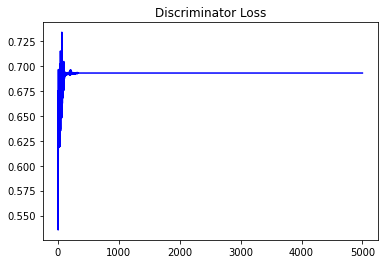

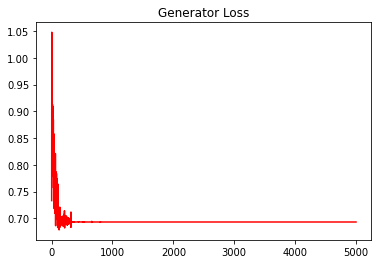

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

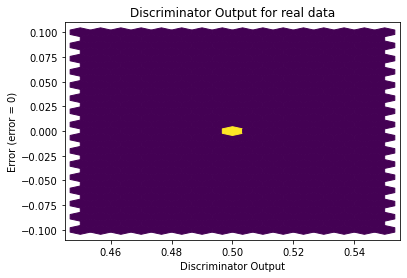

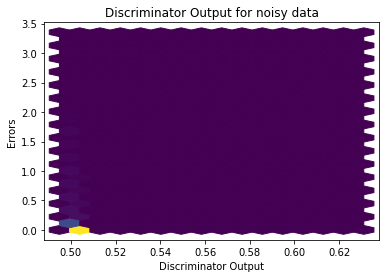

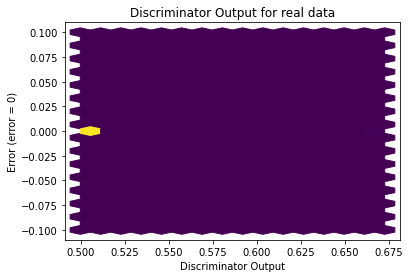

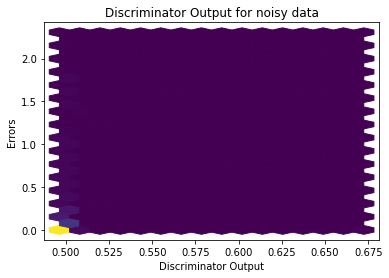

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


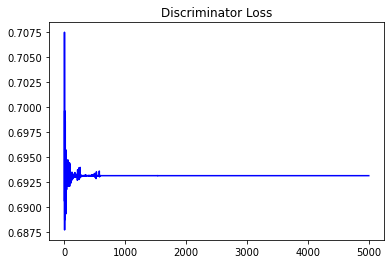

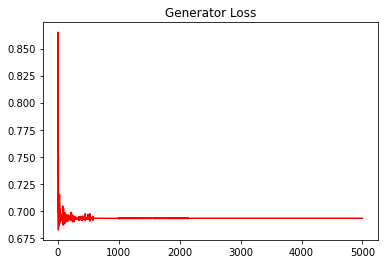

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

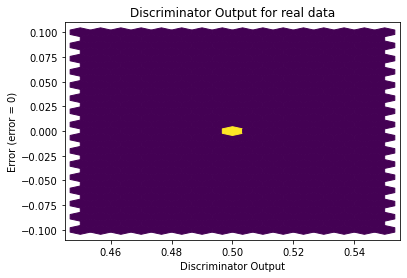

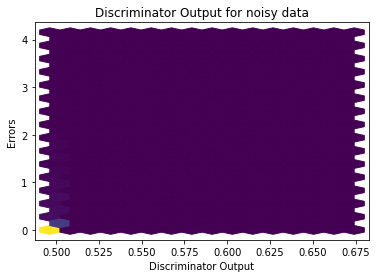

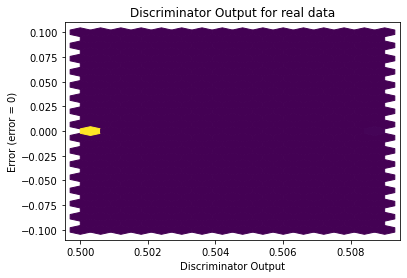

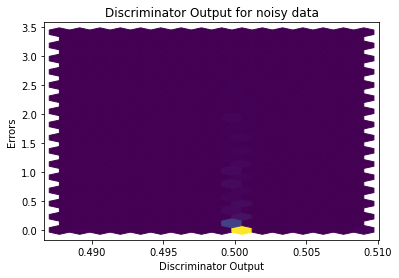

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0497]], device='cuda:0', requires_grad=True)
